# Inicio
Importar librerias y leer el archivo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_csv("articulos_ml.csv")

## Información basica del DataFrame

### Cabeza del DataFrame

In [2]:
df.head()
#df[df["# of comments"].isnull()]
#df["# of comments"] = df["# of comments"].dropna()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [3]:
df.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Rango de dias: 3 a 178
Maximo de compartidas: 200.000
Maximo cant. Links: 39


In [4]:
df = df[(df["Elapsed days"] < 1000) &
         (df["# Shares"] < 200000) & (df["# of Links"] < 600) &
       (df["# of comments"] < 20)]

### Tipo de valores en columnas

In [6]:
df.shape

(119, 8)

In [7]:
df.dtypes

Title              object
url                object
Word count          int64
# of Links          int64
# of comments     float64
# Images video      int64
Elapsed days        int64
# Shares            int64
dtype: object

### Forma del DataFrame

In [ ]:
df.shape

### Columnas del data frame

In [8]:
for column in list(df.columns):
    print(column)

Title
url
Word count
# of Links
# of comments
# Images video
Elapsed days
# Shares


### Cantidad de nulos por columnas

In [9]:
for feature in df.columns:
    print('Total de valores nulos de', feature, '=', df[feature].isna().sum())

Total de valores nulos de Title = 0
Total de valores nulos de url = 17
Total de valores nulos de Word count = 0
Total de valores nulos de # of Links = 0
Total de valores nulos de # of comments = 0
Total de valores nulos de # Images video = 0
Total de valores nulos de Elapsed days = 0
Total de valores nulos de # Shares = 0


### Valores maximos

In [10]:
for feature in df.columns:
    if df[feature].dtype == "float64" or df[feature].dtype == "int64":
        print("Valor maximo de ", feature, ": ", df[feature].max())

Valor maximo de  Word count :  4437
Valor maximo de  # of Links :  49
Valor maximo de  # of comments :  19.0
Valor maximo de  # Images video :  22
Valor maximo de  Elapsed days :  349
Valor maximo de  # Shares :  81403


### Valores minimos

In [ ]:
for feature in df.columns:
    if df[feature].dtype == "float64" or df[feature].dtype == "int64":
        print("Valor maximo de ", feature, ": ", df[feature].min())

## Manejo de datos

### Tratamiento Valores nulos

Se utiliza el promedio del numero de comentarios ya que la cantidad de nulos afectaria la muestra en caso de eliminar esas filas

In [11]:
#Opcion 1: Llenar las casillas nulas con el valor promedio de las demas celdas
#commentsMean = round(df["# of comments"].mean())
#df["# of comments"] = df["# of comments"].fillna(commentsMean)

#Opcion 2: Eliminar los valores nulos de la tabla "# of comments"
df = df.dropna(subset=["# of comments"])

Verificación de que los nulos en la columna *# of comments* fueron cambiados por el promedio

In [12]:
for feature in df.columns:
    print('Total de valores nulos de', feature, '=', df[feature].isna().sum())

Total de valores nulos de Title = 0
Total de valores nulos de url = 17
Total de valores nulos de Word count = 0
Total de valores nulos de # of Links = 0
Total de valores nulos de # of comments = 0
Total de valores nulos de # Images video = 0
Total de valores nulos de Elapsed days = 0
Total de valores nulos de # Shares = 0


### Graficos

Text(0.5, 1.0, 'Grafico 1: Correlación de las columnas')

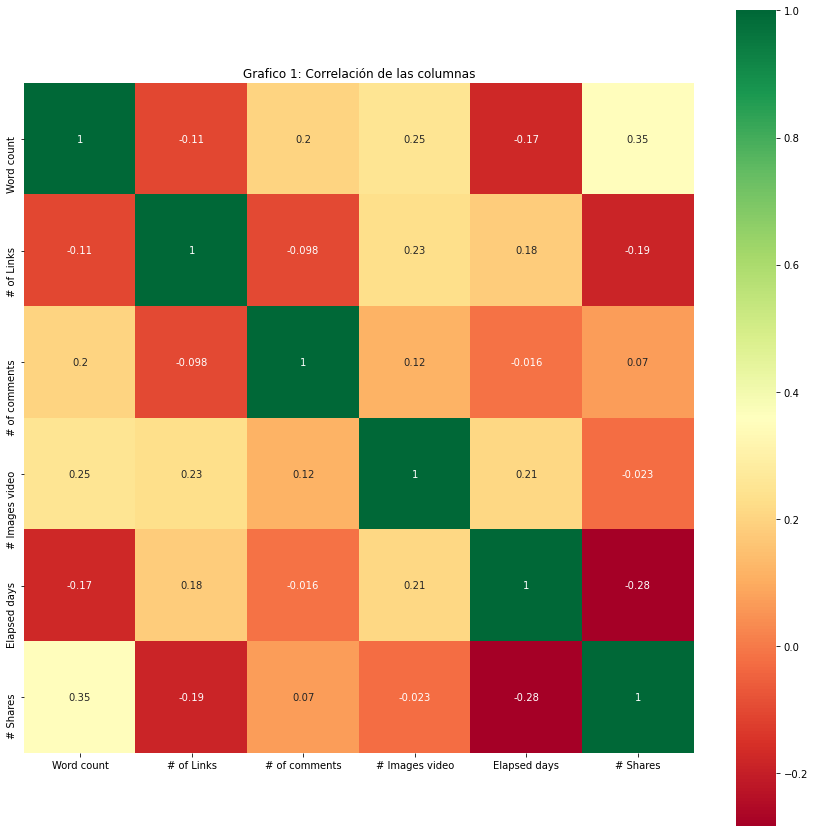

In [13]:
plt.figure(figsize = (15,15))
p = sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)
p.set_title("Grafico 1: Correlación de las columnas")

## Observaciones grafico 1
Con los valores nulos incluidos sin tratar, la columna que mayor correlación tiene con *# Shares* es *# of comments*

En caso de decidir tratar los valores nulos con el promedio de los demas valores, se utiliza el siguiente codigo para llenarlos con el valor entero mas cercano al promedio de los demas valores

In [ ]:
#df["# of comments"] = df["# of comments"].apply(lambda x : round(x) if (x % 1) != 0 else x) 

## Definiendo los valores a utilizar

In [14]:
#Elimina el valor mas alto de links (600)
maxLinks = df["# of Links"].idxmax()
df = df.drop(labels=maxLinks)

#Elimina la cantidad maximo de dais
maxDays = df["Elapsed days"].idxmax()
df = df.drop(labels=maxDays)
df["Elapsed days"].max()

345

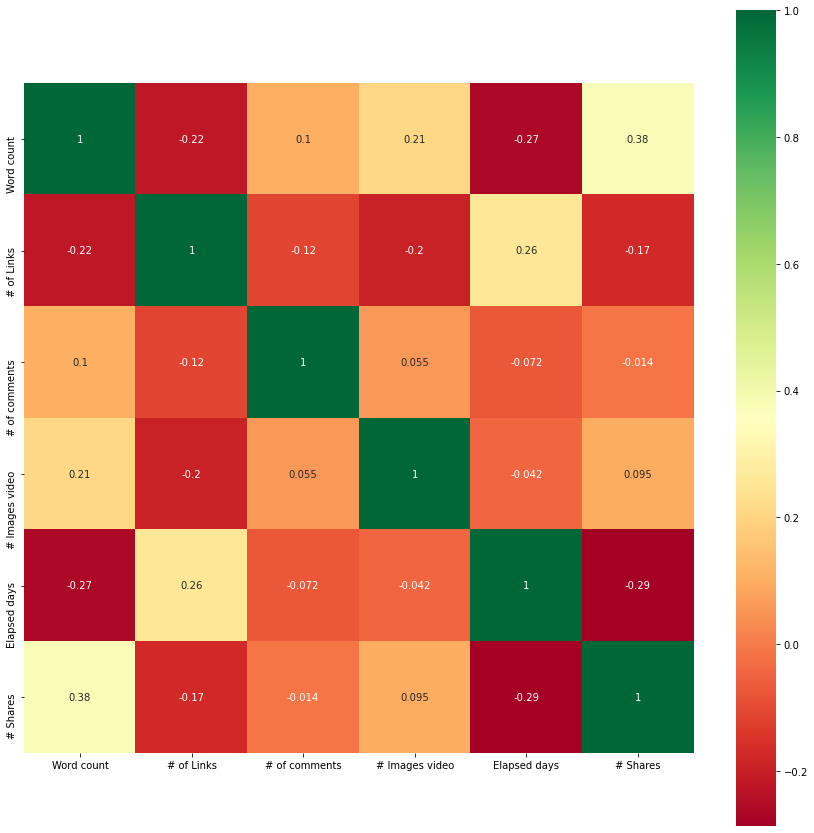

In [15]:
plt.figure(figsize = (15,15))
df2 = df[(df["# of comments"] >= 1) & (df["# of comments"] <= 15) & (df["# Shares"] <= 100000)]

p2 = sns.heatmap(df2.corr(),annot=True,cmap='RdYlGn',square=True)

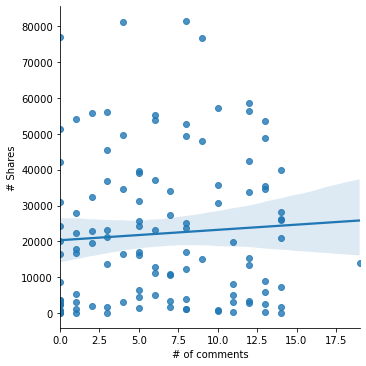

In [16]:
sns.lmplot(x = '# of comments', y = '# Shares', data = df)

Text(0, 0.5, '# of comments')

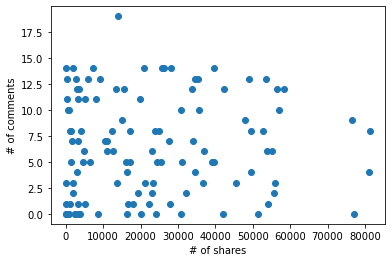

In [17]:
plt.scatter(df["# Shares"], df["# of comments"])
plt.xlabel("# of shares")
plt.ylabel("# of comments")

In [18]:
df["# Shares"].max()

81403

### Observaciones Grafico 2
El grafico 2 muestra 1 punto muy disperso el cual muestra mas de $350.000$ compartidas con un bajo nivel de comentarios, este dato afecta negativamente a la muestra ya que es un parametro muy alejado del resto, por lo que debe ser eliminado.

In [19]:
#Primero conseguimos el index del valor maximo de la columna que queremos sacar
idMaxValue = df["# Shares"].idxmax()
#Eliminamos del DF esa fila
df = df.drop(labels=idMaxValue)

Text(0, 0.5, '# of comments')

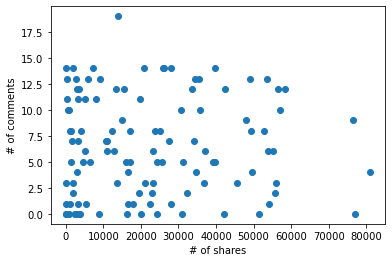

In [20]:
#Comprobamos que el valor haya sido eliminado
plt.scatter(df["# Shares"], df["# of comments"])
plt.xlabel("# of shares")
plt.ylabel("# of comments")

Aun siguen habiendo valores muy alejados del promedio, estos tambien afectan negativamente el resultado, por lo que se borraran para seguir acotando la cantidad de valores

In [21]:
idValues = df["# Shares"].idxmax()

df2 = df[df["# Shares"] <= 200000 and df["# of comments"] > 1]
df2

plt.scatter(df2["# Shares"], df2["# of comments"])
plt.xlabel("# of shares")
plt.ylabel("# of comments")
#df = df.drop(df["# Shares"].max())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Entrenando el modelo

In [22]:
#Columnas de las cuales se sacaran los datos para entrenar el modelo
#df2 = df[df["# Shares"] <= 100000]
X= df[['Word count','# of Links',"# of comments", '# Images video', 'Elapsed days']]
#X= df[['Elapsed days']]
#X = df[['# of comments']]
#Columna con los resultados a predecir
y= df["# Shares"]
# Metodo el cual particiona la data en entrenamiento y prueba, utilizando un 40% de la data como prueba y un 60% para el entrenamiento
# Se utiliza un estado random para evitar que se seleccione siempre la misma data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [23]:
lm = linear_model.LinearRegression()

In [24]:
lm.fit(x_train, y_train)

LinearRegression()

In [26]:
print(lm.intercept_)

24269.94768661351


In [27]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeficiente'])
coeff_df

,Coeficiente
Word count,4.510411
# of Links,-579.950300
# of comments,-97.616326
# Images video,-675.227527
Elapsed days,-66.658112


In [28]:
predictions = lm.predict(x_test)

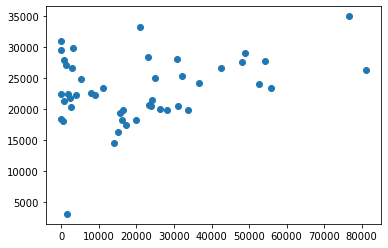

In [30]:
plt.scatter(y_test, predictions)

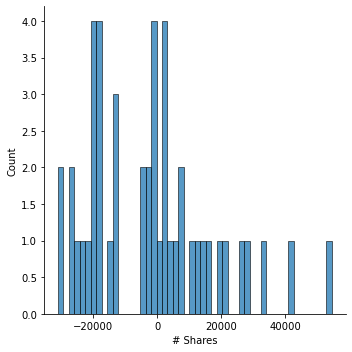

In [31]:
sns.displot((y_test-predictions), bins=50)

In [32]:
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  15334.633120903018
MSE:  376377216.8285089
RMSE:  19400.443727618935


In [33]:

print("Score del modelo: %.2f" % lm.score(x_train, y_train))

Score del modelo: 0.18


In [35]:
df.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
7,How Machine Learning can help Cryptocurrency T...,https://cryptovest.com/news/how-machine-learni...,753,3,0.0,1,78,77000
17,Who’s a good AI? Dog-based data creates a cani...,https://techcrunch.com/2018/04/11/whos-a-good-...,635,3,1.0,2,12,3200
18,Which One to Choose for Your Problem,NaN,1631,6,6.0,9,180,37000
23,How Artificial Intelligence Is Key for Autonom...,NaN,1135,8,0.0,1,146,20000


In [34]:
test = [962,6,0.0,1,10]
prediccion = lm.predict([test])
valor_real = df["# Shares"]
vr = prediccion / valor_real
print(f"Prediccion: {prediccion}, Valor real: {valor_real}, tasa de exito: {vr}")

Prediccion: [23787.45243162], Valor real: 2      42000
7      77000
17      3200
18     37000
23     20000
       ...  
156     3239
157    25019
158    49614
159    33660
160     5956
Name: # Shares, Length: 116, dtype: int64, tasa de exito: 2      0.566368
7      0.308928
17     7.433579
18     0.642904
23     1.189373
         ...   
156    7.344073
157    0.950776
158    0.479450
159    0.706698
160    3.993864
Name: # Shares, Length: 116, dtype: float64
